In [42]:
import sys
sys.path.append('../')
#%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

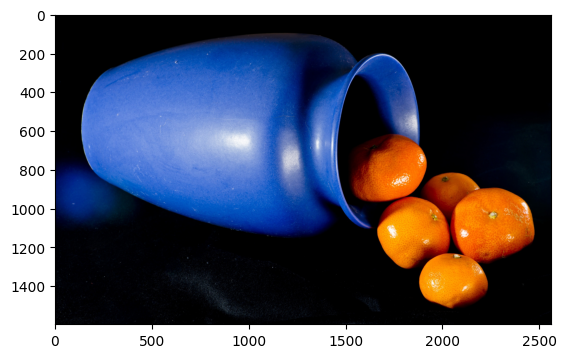

In [43]:
img = cv.imread('image.jpg')
image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

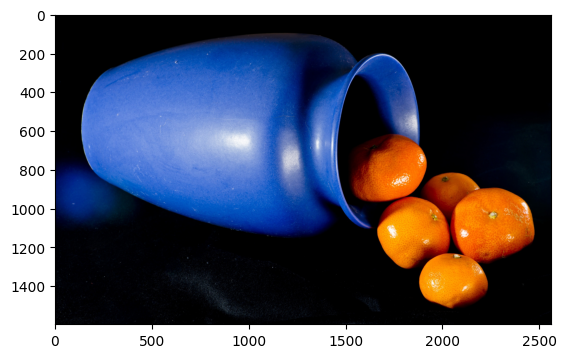

In [44]:
#img = input_image
image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)

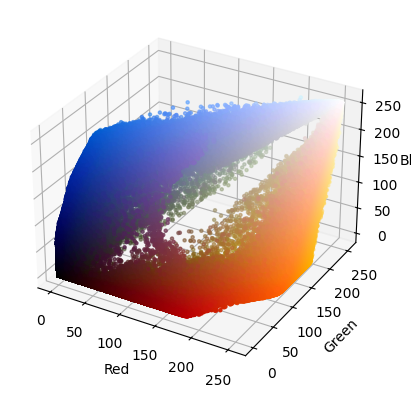

In [45]:
r, g, b = cv.split(image_rgb)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = image_rgb.reshape((np.shape(image_rgb)[0]*np.shape(image_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [46]:
#Найдем на изображении цвета подходящие под маску от светлосинего до темносинего. И добавим маску на изображение.

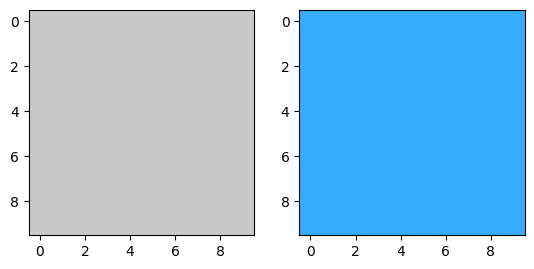

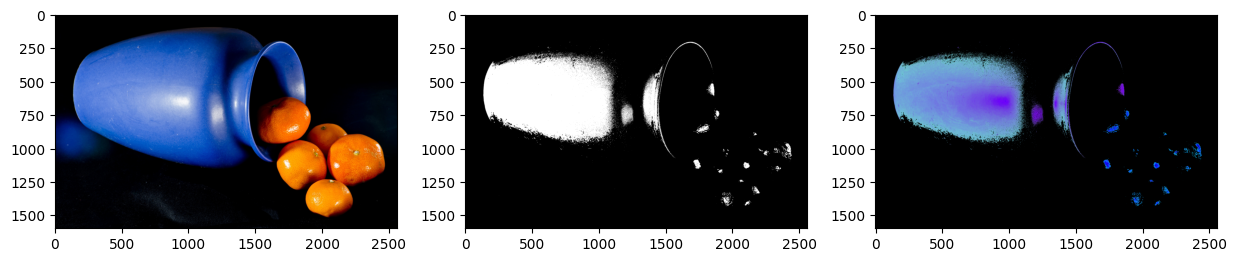

In [47]:
light_white = (0, 0, 200)
dark_white = (145, 200, 255)

lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

mask_white = cv.inRange(image_hsv, light_white, dark_white)
result_white = cv.bitwise_and(image_hsv, image_hsv, mask=mask_white)
plt.figure(figsize=(15,20))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.subplot(1, 3, 2)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result_white)
plt.show()

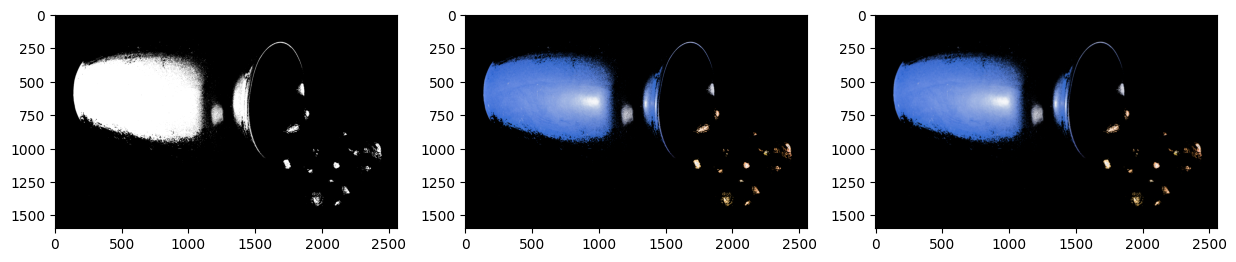

In [48]:
"""Применим обе маски и сгладим изображение"""
mask=mask_white
final_mask = mask + mask_white

final_result = cv.bitwise_and(image_rgb, image_rgb, mask=final_mask)
blur = cv.GaussianBlur(final_result, (7, 7), 0)

plt.figure(figsize=(15,20))
plt.subplot(1, 3, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(final_result)
plt.subplot(1, 3, 3)
plt.imshow(blur)
plt.show()

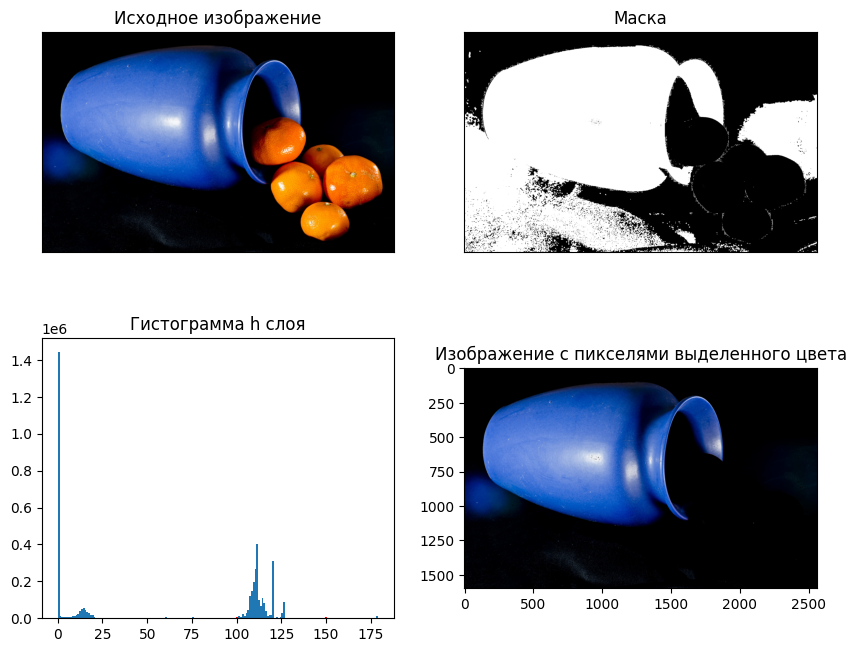

In [49]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
image3 = cv.imread('image.jpg')
rgb_image3 = cv.cvtColor(image3, cv.COLOR_BGR2RGB)
hsv_image3 = cv.cvtColor(rgb_image3, cv.COLOR_RGB2HSV)
h, s, v = cv.split(hsv_image3)

low_h = 100
high_h = 150

mask = cv.inRange(h, low_h, high_h)
result = cv.bitwise_and(rgb_image3, rgb_image3, mask=mask)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(rgb_image3)
plt.title('Исходное изображение')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[1])
plt.imshow(mask, cmap='gray')
plt.title('Маска')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[2])
plt.hist(h.reshape(-1), np.max(h), [np.min(h), np.max(h)])
plt.vlines(low_h, 0, 5000, 'r'), plt.vlines(high_h, 0, 5000, 'r')
plt.title('Гистограмма h слоя')
plt.subplot(gs[3])
plt.imshow(result)
plt.title('Изображение с пикселями выделенного цвета')
plt.show()
